In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [42]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")

In [43]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


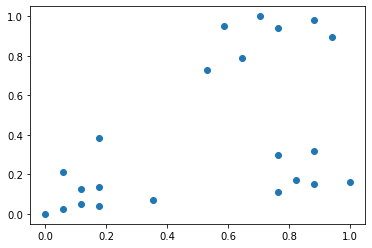

In [48]:
plt.scatter(df['Age'],df['Income($)'])

In [49]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [63]:
km = KMeans(n_clusters=3)

In [64]:
km

KMeans(n_clusters=3)

In [65]:
y_perd = km.fit_predict(df[['Age', 'Income($)']])

In [66]:
y_perd

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [67]:
df['cluster'] = y_perd
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


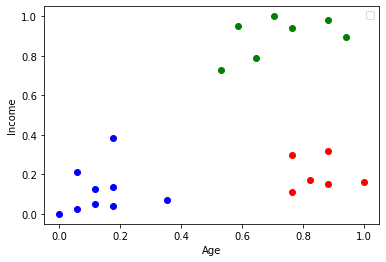

In [68]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income($)'], color= 'green')
plt.scatter(df1['Age'],df1['Income($)'], color= 'blue')
plt.scatter(df2['Age'],df2['Income($)'], color= 'red')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()


In [69]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [70]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


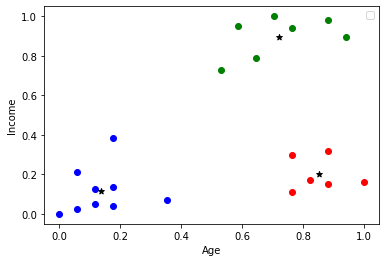

In [71]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income($)'], color= 'green')
plt.scatter(df1['Age'],df1['Income($)'], color= 'blue')
plt.scatter(df2['Age'],df2['Income($)'], color= 'red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = 'black',marker='*')
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [72]:
#for sum squared error 
km.inertia_

0.47507834985530945

So here we decided k on the basics of observation but we cant do it all th time so we need the k value with lowest no of
sum fo squared error (sse)


In [73]:
#method we are assuming range in 10
k_range = range(1,10)
sse=[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
sse
    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.224620705604351,
 0.16869711728567785,
 0.1327661931978319,
 0.10497488680620908]

In [74]:
km.fit_predict(df[['Age','Income($)']])

array([1, 5, 1, 1, 4, 2, 4, 2, 2, 3, 3, 8, 8, 1, 1, 7, 0, 0, 0, 6, 6, 0])

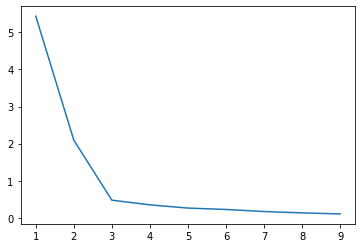

In [75]:
plt.plot(k_range,sse)